In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from utils.nets import *
from utils.model_tools import *
from utils.feature_extractor import *
from utils.dataset_tools import *
from utils.cosine_similarity import *

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Constants

LEARNING_RATE = 0.001 # Different for CIFAR100
EXP_DECAY = 0.0001

batch_size = 64

# Files
CIFAR10_model_file = "./logs/cifar_10_cnn.pt"
FNIST_model_no_boot_bag_file = "./logs/fnist_no_boot_bag.pt"
VGG11_model_file = "./logs/vgg11.pt"
VGG19_model_file = "./logs/vgg19.pt"

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
# Loading general CIFAR10 trainsets/testsets
CIFAR10_train_gen = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
CIFAR10_trainloader_gen = torch.utils.data.DataLoader(CIFAR10_train_gen, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

CIFAR10_test_gen = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
CIFAR10_testloader_gen = torch.utils.data.DataLoader(CIFAR10_test_gen, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

CIFAR10_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# In the paper, the classes left out are 'cat' and 'car'; 'cat' is added back in later

CIFAR10_cnn = CIFAR10Cnn(8)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Filtering classes from CIFAR10

# Creates dataloader without cat and car (indices 1 and 3) classes
no_cat_car_idx = np.where((np.array(CIFAR10_train_gen.targets) != 1) & (np.array(CIFAR10_train_gen.targets) != 3))[0]
no_cat_car_subset = torch.utils.data.Subset(CIFAR10_train_gen, no_cat_car_idx)
no_cat_car_dl = torch.utils.data.DataLoader(no_cat_car_subset, batch_size=batch_size, shuffle=True, num_workers=2)

# Dataloader for everything but car
no_car_idx = np.where((np.array(CIFAR10_train_gen.targets) != 1))[0]
no_car_subset = torch.utils.data.Subset(CIFAR10_train_gen, no_car_idx)
no_car_dl = torch.utils.data.DataLoader(no_car_subset, batch_size=batch_size, shuffle=True, num_workers=2)

# TODO: make a nice little function for this
# TODO: be able to create subsets with certain amounts of classes combined
# not sure if there's an official way but
# could also just get idx of classes and then take random indexes, or maybe there's a way to do that with subset


In [6]:
vgg11 = torchvision.models.vgg11(progress=True)
vgg19 = torchvision.models.vgg19(progress=True)

In [ ]:
# CIFAR100 dataset for VGG11 and VGG19

CIFAR100_train_gen = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
CIFAR100_trainloader_gen = torch.utils.data.DataLoader(CIFAR100_train_gen, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Filtering last 10 classes from CIFAR 100

# Creates dataloader without cat and car (indices 1 and 3) classes
first_90_idx = np.where((np.array(CIFAR100_train_gen.targets) != 90) & 
                        (np.array(CIFAR100_train_gen.targets) != 91) & 
                        (np.array(CIFAR100_train_gen.targets) != 92) & 
                        (np.array(CIFAR100_train_gen.targets) != 93) & 
                        (np.array(CIFAR100_train_gen.targets) != 94) & 
                        (np.array(CIFAR100_train_gen.targets) != 95) & 
                        (np.array(CIFAR100_train_gen.targets) != 96) & 
                        (np.array(CIFAR100_train_gen.targets) != 97) & 
                        (np.array(CIFAR100_train_gen.targets) != 98) & 
                        (np.array(CIFAR100_train_gen.targets) != 99))[0]
first_90_subset = torch.utils.data.Subset(CIFAR100_train_gen, first_90_idx)
first_90_dl = torch.utils.data.DataLoader(first_90_subset, batch_size=batch_size, shuffle=True, num_workers=2)

Files already downloaded and verified


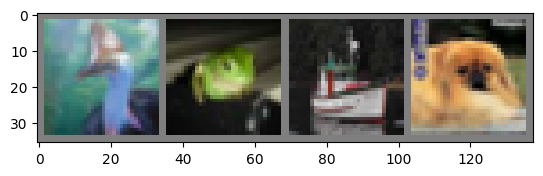

bird  frog  ship  dog  


In [13]:
# Numpy function to show images for verification

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(CIFAR10_trainloader_gen)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{CIFAR10_classes[labels[j]]:5s}' for j in range(batch_size)))


In [4]:
criterion = nn.CrossEntropyLoss()
CIFAR10_optim = optim.Adam(CIFAR10_cnn.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)

NameError: name 'CIFAR10_cnn' is not defined

In [1]:
'''
CIFAR10_cnn_test = CIFAR10Cnn(10)

for epoch in range(5):
    e_loss = train(CIFAR10_trainloader_gen, CIFAR10_cnn_test, criterion, CIFAR10_optim, 'cpu')
    print("Epoch", epoch, "loss:", e_loss)
    '''

'\nCIFAR10_cnn_test = CIFAR10Cnn(10)\n\nfor epoch in range(5):\n    e_loss = train(CIFAR10_trainloader_gen, CIFAR10_cnn_test, criterion, CIFAR10_optim, \'cpu\')\n    print("Epoch", epoch, "loss:", e_loss)\n    '

In [ ]:
# Training our base model with 8 classes

for epoch in range(15):
    e_loss = train(no_cat_car_dl, CIFAR10_cnn, criterion, CIFAR10_optim, 'cpu')
    print("Epoch", epoch, "loss:", e_loss)
    
torch.save(CIFAR10_cnn.state_dict(), CIFAR10_model_file)

In [3]:
# Loading general Fashion MNIST trainsets/testsets: https://github.com/zalandoresearch/fashion-mnist

transform = transforms.ToTensor()


FMNIST_train_gen = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
FMNIST_trainloader_gen = torch.utils.data.DataLoader(FMNIST_train_gen, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

FMNIST_test_gen = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
FMNIST_testloader_gen = torch.utils.data.DataLoader(FMNIST_test_gen, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

FMNIST_classes = {'T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'}


# Paper leaves out 'Ankle boot' and 'Bag' class, which are indices 8 and 9 respectively
# TODO: clean this up to use the nice subset code

no_boot_bag_train_idx = np.where((np.array(FMNIST_train_gen.targets) != 8) & 
                        (np.array(FMNIST_train_gen.targets) != 9))[0]
no_boot_bag_train_subset = torch.utils.data.Subset(FMNIST_train_gen, no_boot_bag_train_idx)
no_boot_bag_train_dl = torch.utils.data.DataLoader(no_boot_bag_train_subset, batch_size=batch_size, shuffle=True, num_workers=2)

no_boot_bag_test_idx = np.where((np.array(FMNIST_test_gen.targets) != 8) & 
                        (np.array(FMNIST_test_gen.targets) != 9))[0]
no_boot_bag_test_subset = torch.utils.data.Subset(FMNIST_test_gen, no_boot_bag_test_idx)
no_boot_bag_test_dl = torch.utils.data.DataLoader(no_boot_bag_test_subset, batch_size=batch_size, shuffle=True, num_workers=2)

boot_train_idx = np.where((np.array(FMNIST_train_gen.targets) == 8))[0]
boot_train_subset = torch.utils.data.Subset(FMNIST_train_gen, boot_train_idx)
boot_train_dl = torch.utils.data.DataLoader(boot_train_subset, batch_size=batch_size, shuffle=True, num_workers=2)

no_bag_test_idx = np.where((np.array(FMNIST_test_gen.targets) != 9))[0]
no_bag_test_subset = torch.utils.data.Subset(FMNIST_test_gen, no_bag_test_idx)
no_bag_test_dl = torch.utils.data.DataLoader(no_bag_test_subset, batch_size=batch_size, shuffle=True, num_workers=2)

In [4]:
criterion = nn.CrossEntropyLoss()
linear_model = LinearFashionMNIST(8)
FMNIST_optim = optim.Adam(linear_model.parameters(), lr=LEARNING_RATE)

num_epochs = 15

decay_rate = (EXP_DECAY/LEARNING_RATE)**(1/num_epochs)

lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=FMNIST_optim, gamma=decay_rate) 
# TODO: we need to use the scheduler for cnn too if we use that

In [7]:
# Training our base model with 8 classes

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train(no_boot_bag_train_dl, linear_model, criterion, FMNIST_optim, 'cpu')
    test_loss = test(no_boot_bag_test_dl, linear_model, criterion, 'cpu')
    
    print("Epoch", epoch, "train loss:", train_loss, "test loss:", test_loss)
    
    lr_scheduler.step()
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
print("Finished training, saving to", FNIST_model_no_boot_bag_file)
torch.save(linear_model.state_dict(), FNIST_model_no_boot_bag_file)

loss: 2.088859  [    0/48000]


KeyboardInterrupt: 

In [5]:
# Extracting features from linear model trained on 8 classes

linear_model = LinearFashionMNIST(8)

linear_model.load_state_dict(torch.load(FNIST_model_no_boot_bag_file))
linear_model.eval()

layers = [name for name in linear_model.state_dict()]
last_layer = layers[-1][:-5] # Takes the last weight layer and removes the weight tag
print("Layer to be extracted:", last_layer)

fnist_feature_ext = FeatureExtractor(linear_model, [last_layer])

Layer to be extracted: linear_stack.1


In [6]:
avgs = get_lda_avgs(linear_model, FMNIST_train_gen, list(range(8)), 8)


In [7]:
import math

In [18]:
print(avgs.shape)

(9, 8)


In [21]:
# avgs is the 9 average class activations, each containing 8 values

avgsl = avgs.tolist()

l = len(avgsl)
d = lambda vi, vj : 1 - (np.dot(vi, vj)/(np.linalg.norm(vi) * np.linalg.norm(vj)))
s = lambda vi, vj : 1 / (1 + math.exp(d(vi,vj)))
    
sim_mat = [[0] * l] * l

for i in range(l): # + 1?
    for j in range(l):
        if i == j:
            sim_mat[i][j] = 0
        else:
            ii = avgsl[i]
            summ = 0
            for k in range(j, l, 1):
                summ += s(ii, avgsl[k])
            sim_mat[i][j] = s(ii, avgsl[j]) / summ
        print(i, j)
        print(sim_mat)
            
            
# the 1,0 loop updates sim_mat[0,0] from 0 to another value
            
# SOS this should be zero: why are these values being rewritten?


0 0
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
0 1
[[0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0, 0, 0, 0, 0, 0, 0]]
0 2
[[0, 0.13003136188745062, 0.16332259545275182, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0.16332259545275182, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0.16332259545275182, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0.16332259545275182, 0, 0, 0, 0, 0, 0], [0, 0.13003136188745062, 0.16332259545275

In [8]:
print([[0] * 8] * 8)

[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]
